In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
rawDF = pd.read_csv('NY-House-Dataset.csv')

In [83]:
rawDF.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [84]:
def makeBarValueCount(aDF, colName) :
    aDF[colName].value_counts().plot(kind="bar", figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title("Count for each entry in " + colName)

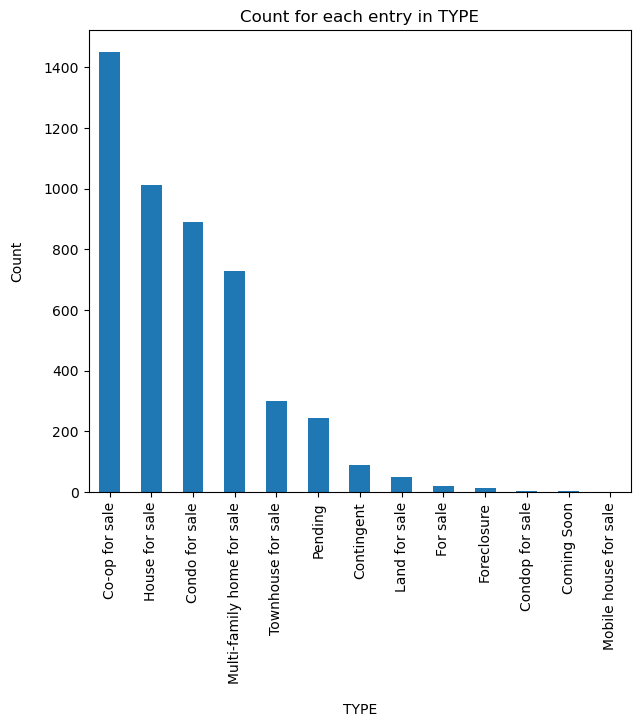

In [85]:
makeBarValueCount(rawDF, "TYPE")

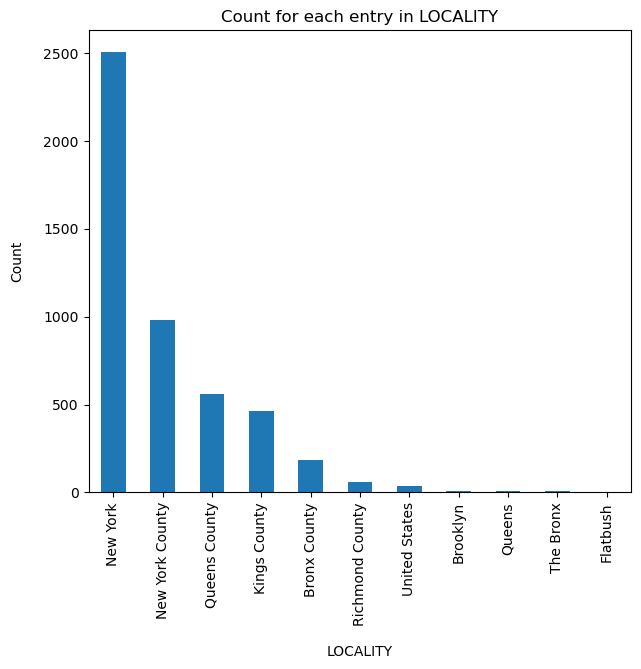

In [86]:
makeBarValueCount(rawDF, "LOCALITY")

In [87]:
for col in rawDF :
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} column is {naCount}")

The number of na values in the BROKERTITLE column is 0
The number of na values in the TYPE column is 0
The number of na values in the PRICE column is 0
The number of na values in the BEDS column is 0
The number of na values in the BATH column is 0
The number of na values in the PROPERTYSQFT column is 0
The number of na values in the ADDRESS column is 0
The number of na values in the STATE column is 0
The number of na values in the MAIN_ADDRESS column is 0
The number of na values in the ADMINISTRATIVE_AREA_LEVEL_2 column is 0
The number of na values in the LOCALITY column is 0
The number of na values in the SUBLOCALITY column is 0
The number of na values in the STREET_NAME column is 0
The number of na values in the LONG_NAME column is 0
The number of na values in the FORMATTED_ADDRESS column is 0
The number of na values in the LATITUDE column is 0
The number of na values in the LONGITUDE column is 0


In [88]:
newDF = rawDF.drop(rawDF[rawDF['TYPE'] == 'Co-op for sale'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Multi-family home for sale'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Condop for sale'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Mobile house for sale'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Pending'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Contingent'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Land for sale'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'For sale'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Foreclosure'].index)
newDF = newDF.drop(rawDF[rawDF['TYPE'] == 'Coming Soon'].index)



In [89]:
locDF = newDF.drop(newDF[newDF['LOCALITY'] == 'United States'].index)
locDF = locDF.drop(newDF[newDF['LOCALITY'] == 'Queens'].index)
locDF = locDF.drop(newDF[newDF['LOCALITY'] == 'Brooklyn'].index)
locDF = locDF.drop(newDF[newDF['LOCALITY'] == 'The Bronx'].index)
locDF = locDF.drop(newDF[newDF['LOCALITY'] == 'Flatbush'].index)

In [90]:
finalcleanDF = locDF.drop(locDF[locDF['PRICE'] > 1500000].index)
finalcleanDF = finalcleanDF.drop(finalcleanDF[finalcleanDF['BEDS'] > 10].index)
finalcleanDF = finalcleanDF.drop(finalcleanDF[finalcleanDF['BATH'] > 10].index)
finalcleanDF = finalcleanDF.drop(finalcleanDF[finalcleanDF['PROPERTYSQFT'] > 2500].index)
finalcleanDF = finalcleanDF.drop(finalcleanDF[finalcleanDF['PROPERTYSQFT'] == 2184.207862].index)
finalcleanDF = finalcleanDF.drop(finalcleanDF[finalcleanDF['PRICE'] > 15000000].index)

Text(0, 0.5, 'Price (millions)')

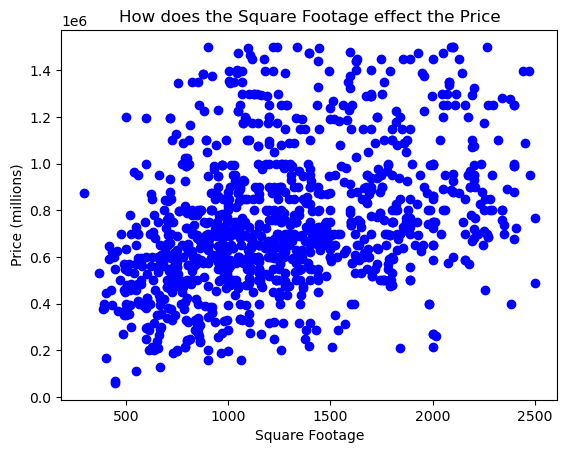

In [102]:
plt.scatter(finalcleanDF['PROPERTYSQFT'], finalcleanDF['PRICE'], color='#0300FF')
plt.title("How does the Square Footage effect the Price")
plt.xlabel('Square Footage')
plt.ylabel('Price (millions)')


Seems to be no correlation between the the size of the house and the price of the house throughout the dataset. Maybe this means it matter more from where the house is located?

In [92]:
finalcleanDF[finalcleanDF['LOCALITY'] == 'New York'].describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,6.490000e+02,649.000000,649.000000,649.000000,649.000000,649.000000
mean,7.641935e+05,3.157165,2.111820,1495.118644,40.668390,-73.976204
std,2.851597e+05,0.959013,0.679795,452.629805,0.100281,0.139333
min,6.900000e+04,1.000000,1.000000,391.000000,40.499798,-74.242487
25%,5.850000e+05,3.000000,2.000000,1158.000000,40.597298,-74.112457
50%,7.280000e+05,3.000000,2.000000,1440.000000,40.631594,-73.943303
75%,9.290000e+05,4.000000,2.000000,1824.000000,40.731708,-73.856514
max,1.500000e+06,7.000000,4.000000,2500.000000,40.905212,-73.703950


In [93]:
NYDF = finalcleanDF[finalcleanDF['LOCALITY'] == 'New York County']
QDF = finalcleanDF[finalcleanDF['LOCALITY'] == 'Queens County']
KDF = finalcleanDF[finalcleanDF['LOCALITY'] == 'Kings County']
BCDF = finalcleanDF[finalcleanDF['LOCALITY'] == 'Bronx County']
RCDF = finalcleanDF[finalcleanDF['LOCALITY'] == 'Richmond County']

Text(0, 0.5, 'Count')

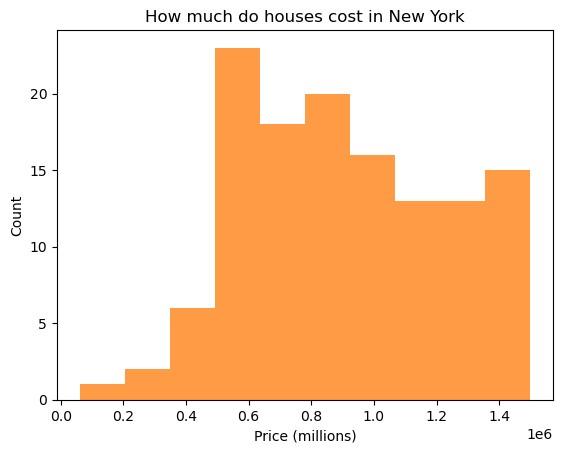

In [106]:
plt.hist(NYDF['PRICE'], color='#FF9A45')
plt.title('How much do houses cost in New York')
plt.xlabel('Price (millions)')
plt.ylabel('Count')

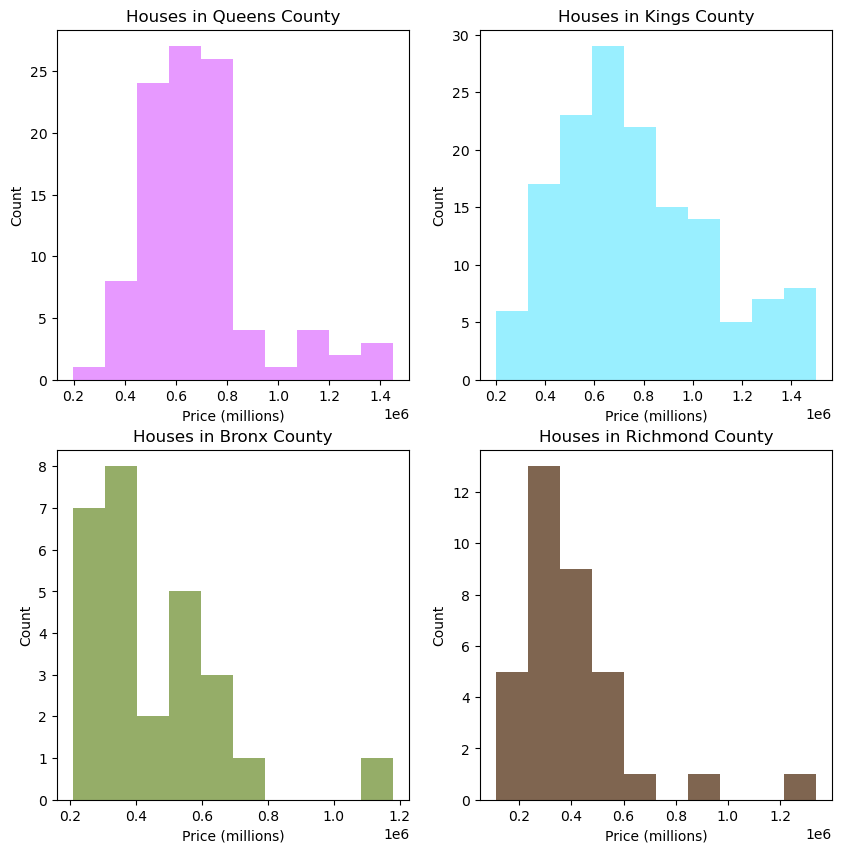

In [105]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].hist(QDF['PRICE'], color='#E799FF')
axs[0,0].set_title('Houses in Queens County')
axs[0,0].set_xlabel('Price (millions)')
axs[0,0].set_ylabel('Count')

axs[0,1].hist(KDF['PRICE'], color='#99EFFF')
axs[0,1].set_title('Houses in Kings County')
axs[0,1].set_xlabel('Price (millions)')
axs[0,1].set_ylabel('Count')

axs[1,0].hist(BCDF['PRICE'], color='#95AD68')
axs[1,0].set_title('Houses in Bronx County')
axs[1,0].set_xlabel('Price (millions)')
axs[1,0].set_ylabel('Count')

axs[1,1].hist(RCDF['PRICE'], color='#7F6550')
axs[1,1].set_title('Houses in Richmond County')
axs[1,1].set_xlabel('Price (millions)')
axs[1,1].set_ylabel('Count')

plt.show()

Now comparing the 4 other counties to New York County we can tell that which county you live in makes a difference on the price of your house.

Text(0, 0.5, 'Price (millions)')

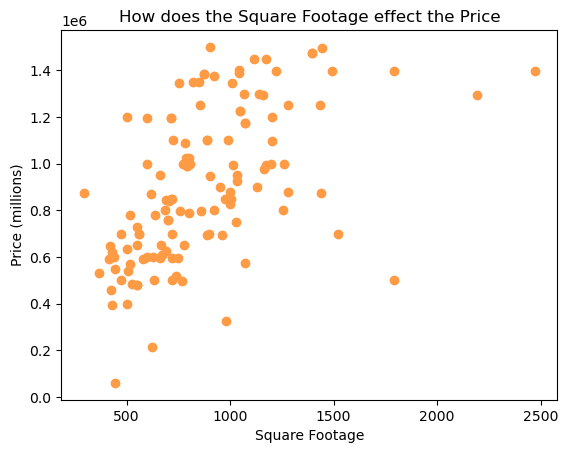

In [107]:
plt.scatter(NYDF['PROPERTYSQFT'], NYDF['PRICE'], color='#FF9A45')
plt.title("How does the Square Footage effect the Price")
plt.xlabel('Square Footage')
plt.ylabel('Price (millions)')

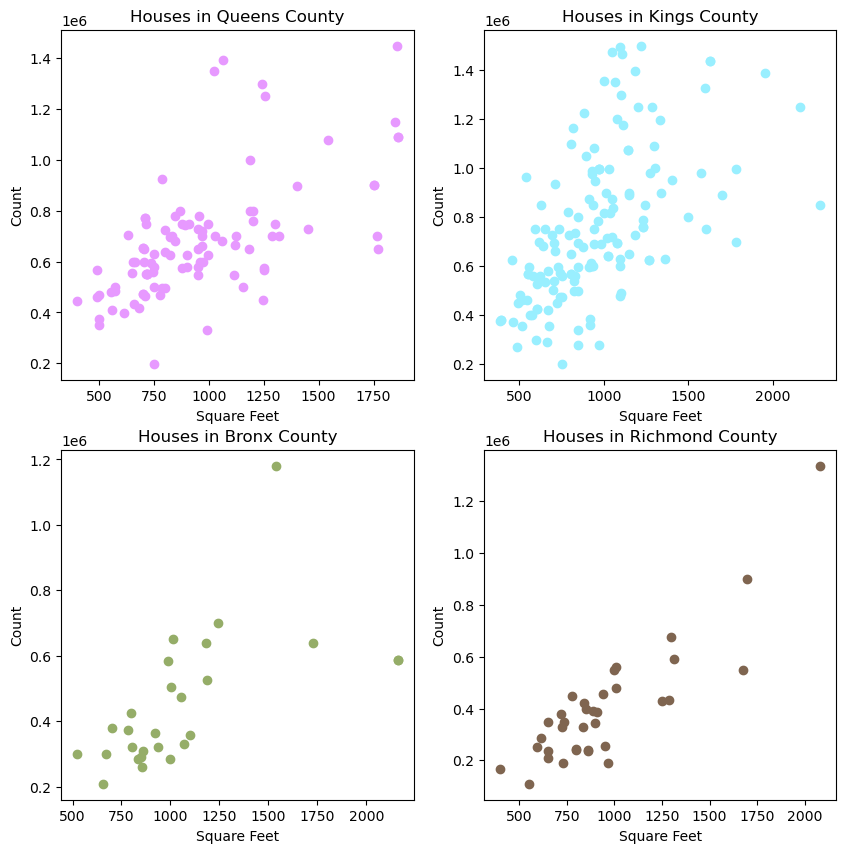

In [108]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].scatter(QDF['PROPERTYSQFT'], QDF['PRICE'], color='#E799FF')
axs[0,0].set_title('Houses in Queens County')
axs[0,0].set_xlabel('Square Feet')
axs[0,0].set_ylabel('Count')

axs[0,1].scatter(KDF['PROPERTYSQFT'], KDF['PRICE'], color='#99EFFF')
axs[0,1].set_title('Houses in Kings County')
axs[0,1].set_xlabel('Square Feet')
axs[0,1].set_ylabel('Count')

axs[1,0].scatter(BCDF['PROPERTYSQFT'], BCDF['PRICE'], color='#95AD68')
axs[1,0].set_title('Houses in Bronx County')
axs[1,0].set_xlabel('Square Feet')
axs[1,0].set_ylabel('Count')

axs[1,1].scatter(RCDF['PROPERTYSQFT'], RCDF['PRICE'], color='#7F6550')
axs[1,1].set_title('Houses in Richmond County')
axs[1,1].set_xlabel('Square Feet')
axs[1,1].set_ylabel('Count')

plt.show()

Then from these graphs we can see the square footage does effect the price a little but it matters more where you live to get the correlation.

In [112]:
qc = QDF['PROPERTYSQFT'].corr(QDF['PRICE'])
kc = KDF['PROPERTYSQFT'].corr(KDF['PRICE'])
bc = BCDF['PROPERTYSQFT'].corr(BCDF['PRICE'])
rc = RCDF['PROPERTYSQFT'].corr(RCDF['PRICE'])
nyc = NYDF['PROPERTYSQFT'].corr(NYDF['PRICE'])

qc, kc, bc, rc, nyc

(0.620181706483795,
 0.573242582916157,
 0.6127837310195722,
 0.8666309836070114,
 0.5553602322663932)